In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as mlt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df = df.drop(columns=['PassengerId', 'Cabin', 'Name', 'Ticket'])

In [6]:
from statistics import median
meanAge = np.mean(df['Age'])
medianAge = df['Age'].median()
print(medianAge)
df['Age'] = df['Age'].fillna(medianAge)

28.0


In [7]:
df1 = df.dropna(subset=['Embarked'])

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df1['Sex'])
df1['Sex'] = le.transform(df1['Sex'])
res_labels = dict(zip(le.classes_, le.transform(le.classes_)))
res_labels = {value:key for key, value in res_labels.items()} 
print(res_labels)

le = preprocessing.LabelEncoder()
le.fit(df1['Embarked'])
df1['Embarked'] = le.transform(df1['Embarked'])
res_labels = dict(zip(le.classes_, le.transform(le.classes_)))
res_labels = {value:key for key, value in res_labels.items()} 
print(res_labels)


{0: 'female', 1: 'male'}
{0: 'C', 1: 'Q', 2: 'S'}


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1['Fare'] = scaler.fit_transform(df1[['Fare']])
df1['Age'] = scaler.fit_transform(df1[['Age']])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,2
1,1,1,0,0.472229,1,0,0.139136,0
2,1,3,0,0.321438,0,0,0.015469,2
3,1,1,0,0.434531,1,0,0.103644,2
4,0,3,1,0.434531,0,0,0.015713,2
...,...,...,...,...,...,...,...,...
886,0,2,1,0.334004,0,0,0.025374,2
887,1,1,0,0.233476,0,0,0.058556,2
888,0,3,0,0.346569,1,2,0.045771,2
889,1,1,1,0.321438,0,0,0.058556,0


In [11]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.363096,0.524184,0.382452,0.062649,1.535433
std,0.486260,0.834700,0.477538,0.163168,1.103705,0.806761,0.097003,0.792088
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412,1.000000
50%,0.000000,3.000000,1.000000,0.346569,0.000000,0.000000,0.028213,2.000000
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508,2.000000
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000,2.000000


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [13]:
# sns.pairplot(df1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

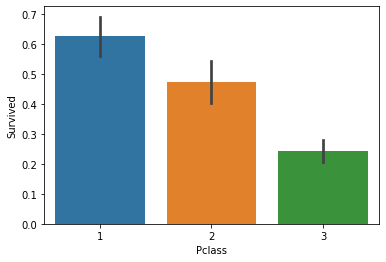

In [14]:
sns.barplot(df1['Pclass'], df1['Survived'])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns = ['Survived']), df1['Survived'],
                                                             test_size=0.2, random_state=42)

In [16]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)
clf_svm.predict(X_test)
clf_svm.score(X_test, y_test)
clf_svm.fit(df1.drop(columns = ['Survived']), df1['Survived'])

SVC()

In [17]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
y_pred = clf_nb.fit(X_train, y_train).predict(X_test)
clf_nb.score(X_test, y_test)

0.7752808988764045

In [18]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
y_pred = clf_tree.fit(X_train, y_train).predict(X_test)
clf_tree.score(X_test, y_test)

0.7471910112359551

In [19]:
meanFare = df1['Fare'].median()

In [20]:
def preProcessor(_df):
    global meanAge
    _df = _df.drop(columns=['PassengerId', 'Cabin', 'Name', 'Ticket'])
    _df['Age'] = _df['Age'].fillna(np.mean(medianAge))
    _df = _df.dropna(subset=['Embarked'])
    _df['Fare'] = _df['Fare'].fillna(np.mean(meanFare))
    
    le = preprocessing.LabelEncoder()
    le.fit(_df['Sex'])
    _df['Sex'] = le.transform(_df['Sex'])
    res_labels = dict(zip(le.classes_, le.transform(le.classes_)))
    res_labels = {value:key for key, value in res_labels.items()} 

    le = preprocessing.LabelEncoder()
    le.fit(_df['Embarked'])
    _df['Embarked'] = le.transform(_df['Embarked'])
    res_labels = dict(zip(le.classes_, le.transform(le.classes_)))
    res_labels = {value:key for key, value in res_labels.items()} 
    
    scaler = MinMaxScaler()
    _df['Fare'] = scaler.fit_transform(_df[['Fare']])
    _df['Age'] = scaler.fit_transform(_df[['Age']])
    
    return _df
    

In [21]:
testDf = pd.read_csv('/kaggle/input/titanic/test.csv')
_df = preProcessor(testDf)
op = clf_svm.predict(_df)
output = pd.DataFrame({'PassengerId': testDf['PassengerId'], 'Survived': op})
output.to_csv('/kaggle/working/submission.csv', index=False)
